# Week 1 problems

In [2]:
import numpy as np

from matplotlib import pyplot as plt
import scipy.stats



## Problem 1
Suppose the globe tossing data (Chapter 2) had turned out to be 4 water
and 11 land. Construct the posterior distribution, using grid approximation.
Use the same flat prior as in the book.

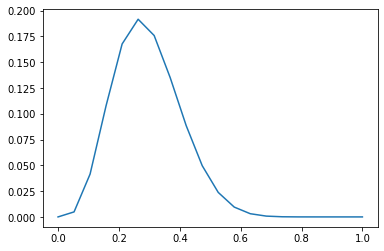

In [15]:

p_grid = np.linspace(0, 1, 20)
prior = np.ones_like(p_grid)

likelihood = scipy.stats.binom.pmf(4, 4+11, p=p_grid)


posterior = likelihood*prior
posterior/=sum(posterior)

plt.plot(p_grid,posterior);


## Problem 2
Now suppose the data are 4 water and 2 land. Compute the posterior
again, but this time use a prior that is zero below p = 0.5 and a constant
above p = 0.5. This corresponds to prior information that a majority of the
Earth’s surface is water.

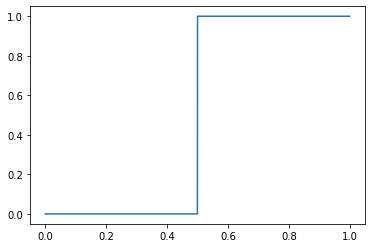

In [99]:
p_grid = np.linspace(0, 1, 2000)
prior = np.concatenate([np.zeros(int(p_grid.size/2)),
                        np.ones(int(p_grid.size/2))])
plt.plot(p_grid, prior);

In [122]:
likelihood = scipy.stats.binom.pmf(4, 4+2, p=p_grid)
posterior = likelihood*prior
posterior/=sum(posterior)

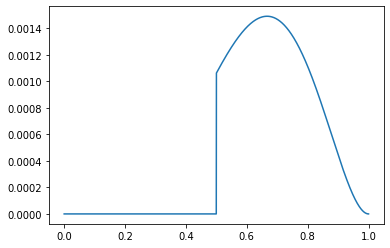

In [123]:
# plt.plot(p_grid,prior, );
plt.plot(p_grid,posterior);
# plt.legend(['prior', 'posterior']);

## Problem 3
For the posterior distribution from 2, compute 89% percentile and HPDI
intervals. Compare the widths of these intervals. Which is wider? Why? If
you had only the information in the interval, what might you misunderstand
about the shape of the posterior distribution?

In [124]:
samples=np.random.choice(p_grid,p=posterior, size=1000)

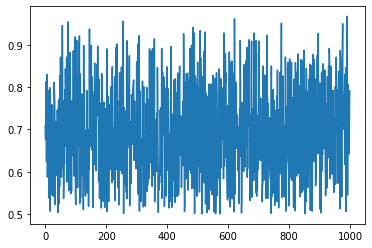

In [125]:
plt.plot(samples,'');

In [126]:
pi=np.percentile(samples, [5.5, 94.5])
pi

array([0.52926463, 0.88094047])

In [127]:
# from pymc3 import stats
import arviz
hdi=arviz.stats.hdi(samples , .89)
hdi

array([0.50075038, 0.84042021])

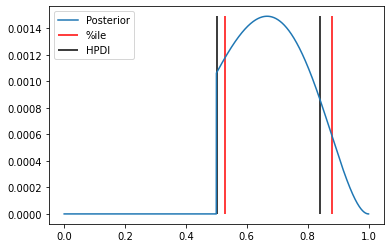

In [131]:
plt.plot(p_grid,posterior);
plt.vlines(pi,0,max(posterior),'r');
plt.vlines(hdi,0,max(posterior),'k');
plt.legend(['Posterior','%ile', 'HPDI'])

## Problem 4
OPTIONAL CHALLENGE. Suppose there is bias in sampling so that Land
is more likely than Water to be recorded. Specifically, assume that 1-in-5
(20%) of Water samples are accidentally recorded instead as ”Land”. First,
write a generative simulation of this sampling process. Assuming the true
proportion of Water is 0.70, what proportion does your simulation tend to
produce instead? Second, using a simulated sample of 20 tosses, compute
the unbiased posterior distribution of the true proportion of water.

In [197]:
def draw_sample(k=4):
    this_sample = np.random.binomial(1, p=0.7)
    if this_sample and np.random.uniform()<.2:
        this_sample=0  # Flip
    return this_sample

np.mean([draw_sample() for _ in range(200)])


0.505

In [ ]:
biased_samples = [draw_sample() for _ in range(20)]
for this_sample in biased_samples:
    this_sample 